In [1]:
from scipy.optimize import minimize
import numpy as np
from random import gauss
import scipy as sp

In [48]:
def center_image_fiducials(dimensions,fiducials):

    ''' Centers image fiducial points using image dimensions  '''

    for i in range(np.shape(fiducials)[0]):
        fiducials[i,0] = fiducials[i,0] - (dimensions[0] / 2)
        fiducials[i,1] = fiducials[i,1] - (dimensions[1] / 2)

    return fiducials

In [3]:
def colin(params, xyz_a):

	# Unwrap params
	kappa, phi, omega, xs, ys, zs, f = params

	omega = float(omega)
	phi = float(phi) + 0.5*np.pi
	kappa = float(kappa)
	xs = float(xs)
	ys = float(ys)
	zs = float(zs)
	f = float(f)

	# -- utils
	co = np.cos(omega)
	so = np.sin(omega)
	cp = np.cos(phi)
	sp = np.sin(phi)
	ck = np.cos(kappa)
	sk = np.sin(kappa)

	a1 =  cp*ck+sp*so*sk
	b1 =  cp*sk+sp*so*ck
	c1 =  sp*co
	a2 = -co*sk
	b2 =  co*ck
	c2 =  so
	a3 =  sp*ck+cp*so*sk
	b3 =  sp*sk-cp*so*ck
	c3 =  cp*co

	ynum  = a1*(xyz_a[:,0]-xs)+b1*(xyz_a[:,1]-ys)+c1*(xyz_a[:,2]-zs)
	xnum  = a2*(xyz_a[:,0]-xs)+b2*(xyz_a[:,1]-ys)+c2*(xyz_a[:,2]-zs)
	denom = a3*(xyz_a[:,0]-xs)+b3*(xyz_a[:,1]-ys)+c3*(xyz_a[:,2]-zs)

	xx = -f*xnum/denom
	yy = f*ynum/denom

	return np.vstack([xx,yy]).T

        '''	
	# Get number of fiducial points
	N = int(xyz_a.shape[0])

	# Initialize the result vector
	colin_xy = np.zeros((N,2))

	# Define c code that will evaluate the functions
	code = """

		double sinp = sinf(phi);
		double cosp = cosf(phi);
		double sino = sinf(omega);
		double coso = cosf(omega);
		double sink = sinf(kappa);
		double cosk = cosf(kappa);

		double a1 = cosp*cosk;
		double b1 = coso*sink + sino*sinp*cosk;
		double c1 = sino*sink - coso*sinp*cosk;
		double a2 = -1 * cosp*sink;
		double b2 = coso*cosk - sino*sinp*sink;
		double c2 = sino*cosk + coso*sinp*sink;
		double a3 = sinp;
		double b3 = -1*sino*cosp;
		double c3 = cosp*coso;

		int j;
		int k;
		double denom;

		for(int i = 0; i < N; i++)
		{
			j = i*2;
			k = i*3;
			denom = (a3*(xyz_a[k]-xs) + b3*(xyz_a[(k+1)]-ys) + c3*(xyz_a[(k+2)]-zs));

			colin_xy[j] = -1.0*f*(a1*(xyz_a[k]-xs) + b1*(xyz_a[(k+1)]-ys) + c1*(xyz_a[(k+2)]-zs))/denom;
			colin_xy[(j+1)] = -1.0*f*(a2*(xyz_a[k]-xs) + b2*(xyz_a[(k+1)]-ys) + c2*(xyz_a[(k+2)]-zs))/denom;
		}
		return_val = 1;
	"""

	# Use scipy.weave.inline to run the c code
	res = inline(code, ['colin_xy', 'omega', 'phi', 'kappa', 'xs', \
		'ys', 'zs', 'f', 'xyz_a', 'N'], headers = ['<math.h>'], \
		compiler = 'gcc')
	
	# Return the pixel (x,y) positions
	return colin_xy
	'''

In [21]:
def colinN(params, xyz_a):

	# Unwrap params
	kappa, phi, omega, xs, ys, zs, f = params

	omega = float(omega)*2*np.pi
	phi = (float(phi)*0.5*np.pi)+0.5*np.pi
	kappa = float(kappa)*2*np.pi
	xs = (float(xs)*25000)+975000
	ys = (float(ys)*30000) + 192000
	zs = float(zs)*2000
	f = float(f)*3000

	# -- utils
	co = np.cos(omega)
	so = np.sin(omega)
	cp = np.cos(phi)
	sp = np.sin(phi)
	ck = np.cos(kappa)
	sk = np.sin(kappa)

	a1 =  cp*ck+sp*so*sk
	b1 =  cp*sk+sp*so*ck
	c1 =  sp*co
	a2 = -co*sk
	b2 =  co*ck
	c2 =  so
	a3 =  sp*ck+cp*so*sk
	b3 =  sp*sk-cp*so*ck
	c3 =  cp*co

	ynum  = a1*(xyz_a[:,0]-xs)+b1*(xyz_a[:,1]-ys)+c1*(xyz_a[:,2]-zs)
	xnum  = a2*(xyz_a[:,0]-xs)+b2*(xyz_a[:,1]-ys)+c2*(xyz_a[:,2]-zs)
	denom = a3*(xyz_a[:,0]-xs)+b3*(xyz_a[:,1]-ys)+c3*(xyz_a[:,2]-zs)

	xx = -f*xnum/denom
	yy = f*ynum/denom

	return np.vstack([xx,yy]).T

        '''	
	# Get number of fiducial points
	N = int(xyz_a.shape[0])

	# Initialize the result vector
	colin_xy = np.zeros((N,2))

	# Define c code that will evaluate the functions
	code = """

		double sinp = sinf(phi);
		double cosp = cosf(phi);
		double sino = sinf(omega);
		double coso = cosf(omega);
		double sink = sinf(kappa);
		double cosk = cosf(kappa);

		double a1 = cosp*cosk;
		double b1 = coso*sink + sino*sinp*cosk;
		double c1 = sino*sink - coso*sinp*cosk;
		double a2 = -1 * cosp*sink;
		double b2 = coso*cosk - sino*sinp*sink;
		double c2 = sino*cosk + coso*sinp*sink;
		double a3 = sinp;
		double b3 = -1*sino*cosp;
		double c3 = cosp*coso;

		int j;
		int k;
		double denom;

		for(int i = 0; i < N; i++)
		{
			j = i*2;
			k = i*3;
			denom = (a3*(xyz_a[k]-xs) + b3*(xyz_a[(k+1)]-ys) + c3*(xyz_a[(k+2)]-zs));

			colin_xy[j] = -1.0*f*(a1*(xyz_a[k]-xs) + b1*(xyz_a[(k+1)]-ys) + c1*(xyz_a[(k+2)]-zs))/denom;
			colin_xy[(j+1)] = -1.0*f*(a2*(xyz_a[k]-xs) + b2*(xyz_a[(k+1)]-ys) + c2*(xyz_a[(k+2)]-zs))/denom;
		}
		return_val = 1;
	"""

	# Use scipy.weave.inline to run the c code
	res = inline(code, ['colin_xy', 'omega', 'phi', 'kappa', 'xs', \
		'ys', 'zs', 'f', 'xyz_a', 'N'], headers = ['<math.h>'], \
		compiler = 'gcc')
	
	# Return the pixel (x,y) positions
	return colin_xy
	'''

In [36]:
def fullfunc(params,xyz_s,xy_t):

    ''' Find the sum of squares difference '''
    omega, phi, kappa, xs, ys, zs, f = params


#     if (omega<0.0) or (omega>=2.0*np.pi):
#         return 1e9+omega**4
#     elif (phi<-0.5*np.pi) or (phi>=0.5*np.pi):
#         return 1e9+phi**4
#     elif (kappa<0.0) or (kappa>=2.0*np.pi):
#         return 1e9+kappa**4
#     elif zs<0.0:
#         return 1e9+zs**4
#     elif f<0.0:
#         return 1e9+f**4

#     elif (np.abs(params[3] - 977119)>1000) or \
#             (np.abs(params[4] - 210445)>1000):
#         return 1e9 + xs**2

    colin_xy = 1.0*colinN(params,xyz_s.astype(float))
    diff = ((colin_xy - xy_t)**2).sum()

    return diff

In [43]:
def call(params,xyz_s,xy_t):

    ''' Guess parameters near start and brute-force minimize '''
    start = params
    
    boundsN=[(0.01, 0.99), (-0.99, 0.99), (-0.1, 0.1),
            (0.0001, 0.9999), (0.0001, 0.9999), (0.35, 0.45), (0.1, 1.2)]
    
    res = minimize(fullfunc, start,args=(xyz_s,xy_t), \
        method = 'L-BFGS-B', \
        #options={'maxfev': 10000, 'maxiter': 10000})    # Nelder-Mead
        options={'disp': True, 'maxiter': 10000, 'gtol': 0.001}, bounds=boundsN) #BFGS

    return res

In [8]:
def random_start(params):

# 	''' Perturbs camera position in a gaussian fashion '''
# 	return params
# 	return params + np.array([gauss(0, 0.1), gauss(0, 0.1), \
# #	gauss(0, 0.1),gauss(0, 20000),gauss(0, 20000), \
# 	gauss(0, 0.1),gauss(0, 100),gauss(0, 100), \
# 	gauss(0, 100), gauss(0, 30)])
# #	gauss(0, 10), gauss(0, 2000)])

    return params + np.array([gauss(0, 0.1), gauss(0, 0.1), gauss(0, 0.1),
                              gauss(0, 0.1), gauss(0, 0.1),
                              gauss(0, 0.1), gauss(0, 0.1)])

In [68]:
lidar_fiducials = np.array([
                            [988328.741, 211962.778,1020.623838], #Empire state building
                            [980648.447, 199131.861,1380.707975], #WTC
                            [987656.616, 211766.233,493.89], # 1250 Broadway
                            [983564.98, 199358.775,591.406796], # Marshall courthouse
                            [987342.468, 212511.054,380.69], #  112 West 34th St
                            [988596.086, 211789.785,255.31], # 347 5th Ave
                            [988287.232, 213228.734,488.716947],  # 66 W 38th St
                            [984574.798, 204219.63, 303.263412], # 505 LaGuardia Place, second leftmost edge 
                            [987140.31, 209161.591, 324.317488], # Flatiron, left point on triange rooftop, under the fence
                            [986252.724, 205516.404, 365.468789]]) # 755 Broadway, leftmost corner on the roof
                            

In [69]:
xyz_s = lidar_fiducials

In [93]:
xyz_s.shape

(10L, 3L)

In [70]:
fiducials = np.array([
                        [507, 856],#Empire state building
                        [1681, 1004],# WTC
                        [1185, 1400], # 1250 Broadway
                        [1217, 1143], # Marshall courthouse
                        [1860, 1637], #  112 West 34th St
                        [211, 1704], # 347 5th Ave
                        [814, 1811], # 66 W 38th St
                        [1362, 1234], # 505 LaGuardia Place
                        [1037, 1355], # Flatiron
                        [1013, 1237]]) # 755 Broadway

dimensions = np.array([1918, 2560])
fiducials = center_image_fiducials(dimensions,fiducials)

In [71]:
xy_t = fiducials

In [42]:
(988491.-975000)/25000

0.53964

In [45]:
(214475. - 192000)/30000

0.7491666666666666

In [48]:
800./2000

0.4

In [49]:
1000./3000

0.3333333333333333

In [72]:
guessN = np.array([0.75, -0.2, 0, 0.53964, 0.7491666666666666, 0.4, 0.3333])
#guess = np.array([4.48603184, -5.75616093e-02, 0.0115, 988491, 214475, 830, 1000])
min_score = 100000000000000
num_iter = 100
params = guessN
for i in range(0, num_iter):
    start = random_start(params)
    result = call(start,xyz_s,xy_t)
    print "params: ", result.x
    print "score: ", result.fun
    if (result.fun < min_score):# and (result.x[3] < 980491):
        min_score = result.fun
        params = result.x

params:  [ 0.87731517  0.33784641 -0.1         0.57766698  0.66024252  0.35        0.1       ]
score:  2703353.44362
params:  [  9.25509068e-01  -3.79471193e-01   1.00000000e-01   9.99900000e-01
   1.00000000e-04   4.50000000e-01   1.00000000e-01]
score:  3569646.68383
params:  [  9.51624761e-01   2.68270282e-01  -1.00000000e-01   9.99900000e-01
   1.00000000e-04   3.50000000e-01   1.00000000e-01]
score:  3340864.61598
params:  [ 0.77094506 -0.19343022 -0.1         0.5124042   0.51963018  0.35        0.1       ]
score:  2724984.13904
params:  [ 0.99       -0.36085288  0.09692096  0.21022123  0.66231518  0.37363438
  0.1       ]
score:  2327125.37074
params:  [ 0.99       -0.36145984  0.09706053  0.20878908  0.66129328  0.40107684
  0.1       ]
score:  2327116.0116
params:  [ 0.99       -0.36052967  0.0968469   0.21096261  0.66284526  0.35931213
  0.1       ]
score:  2327129.34499
params:  [ 0.99       -0.36064261  0.096873    0.21068253  0.66264468  0.36462069
  0.1       ]
score:  232

In [86]:
print params, min_score

[ 0.21418991  0.03569686 -0.00192143  0.54019445  0.74981342  0.39970558
  0.94393963] 573.069200343


In [46]:
def params_orig(params):
    params_orig = [
        params[0]*2*np.pi,
        params[1]*0.5*np.pi,
        params[2]*2*np.pi,
        (params[3]*25000)+975000,
        (params[4]*30000) + 192000,
        params[5]*2000,
        params[6]*3000

    ]
    return params_orig

## BEST PARAMS SO FAR

In [87]:
params_orig(params)

[1.3457948995547115,
 0.056072499162356862,
 -0.012072703267366824,
 988504.86135706992,
 214494.40249620657,
 799.41116991077035,
 2831.818902032514]

In [52]:
import matplotlib.pyplot as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [77]:
print fiducials[1,0]+1918/2, -(fiducials[1,1]+2560/2)

1681 -1004


In [88]:
print (proj_fid[1, 0]+1918/2).astype(int), -(proj_fid[1,1]+2560/2).astype(int)

1673 -1000


(-2560, 0)

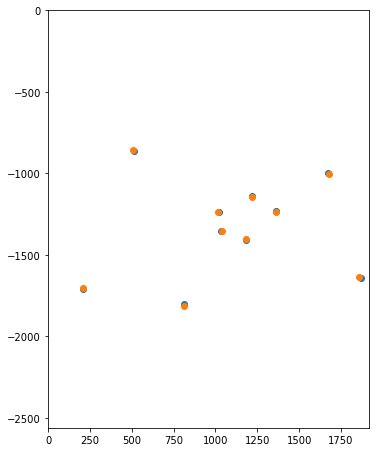

In [78]:
s=3
pl.figure(figsize=(s*1.918,s*2.560))
proj_fid = colin(params_orig(params), lidar_fiducials)
pl.scatter(proj_fid[:, 0]+1918/2, -(proj_fid[:,1]+2560/2))
pl.scatter(fiducials[:,0]+1918/2, -(fiducials[:,1]+2560/2))
pl.xlim(0,1918)
pl.ylim(-2560,0)

### Testing function project

In [84]:
from project_lidar import in_picture
from project_lidar import distance

In [102]:
#def project(filename, params):  

# Finds the desired projection

omega, phi, kappa, xs, ys, zs, f = params_orig(params)
image_dims = [1918, 2560]
image_dims_reversed = np.array([image_dims[1], \
    image_dims[0]])

# Rearrange
#print "working on: ", filename
dat = np.load('data_npy_test/x-978979.241501_y-198575.073690.npy').copy()


# Multiply by -1 because it apears as inverse; use orient?
pixel_xy = 1.0*colin(params, dat)
print pixel_xy[:10]

# un-center pixel (x,y)
x = image_dims[0]/2 + pixel_xy[:,0].astype(int)
y = image_dims[1]/2 + pixel_xy[:,1].astype(int)
print x[:10], y[:10]

is_in_picture = in_picture(x,y,image_dims)
print is_in_picture[:10]

index = np.arange(is_in_picture.size)[is_in_picture>0]
print index[:10]
print "npix = ", index.size

distgrid = np.ones(image_dims_reversed)*(100000.0)
xgrid =  -1.*np.ones(image_dims_reversed)
ygrid = -1.*np.ones(image_dims_reversed)

if index.size==0:
    print "no points, returning..."
    #return [distgrid, xgrid, ygrid]

n   = distance(xs,ys,zs, dat[index,0],dat[index,1],dat[index,2]) 
x   = x[index]
y   = y[index]
dat = dat[index]

# # Add each point to the arrays, given it is visibile (vis[i] == 1)
# # And it is closer to the camera than the current value stored in 
# # the corresponding pixel of the distance array

# nx = distgrid.shape[1]-1
# ny = distgrid.shape[0]-1

# for ii in range(index.size):
#     if n[ii]<distgrid[ny-y[ii],nx-x[ii]] and n[ii]>500:
#         distgrid[ny-y[ii],nx-x[ii]] = n[ii]
#         xgrid[ny-y[ii],nx-x[ii]] = dat[ii,0]
#         ygrid[ny-y[ii],nx-x[ii]] = dat[ii,1]

# print "Done with: ",filename
# return [distgrid, xgrid, ygrid]


[[ 0.01328748 -0.03444055]
 [ 0.01328767 -0.03444055]
 [ 0.01328785 -0.03444055]
 [ 0.01328804 -0.03444055]
 [ 0.01328823 -0.03444055]
 [ 0.01328842 -0.03444055]
 [ 0.01328861 -0.03444055]
 [ 0.01328879 -0.03444055]
 [ 0.01328898 -0.03444055]
 [ 0.01328917 -0.03444055]]
[959 959 959 959 959 959 959 959 959 959] [1280 1280 1280 1280 1280 1280 1280 1280 1280 1280]
[ True  True  True  True  True  True  True  True  True  True]
[0 1 2 3 4 5 6 7 8 9]
npix =  4194304


In [103]:
npix/2064

NameError: name 'npix' is not defined